# SUPERSTORE DATA ANALYSIS PROJECT

~Niveditha Sanapala

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:\\Users\\Niveditha S\\Downloads")

In [3]:
df=pd.read_csv('SampleSuperstore.csv')

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# DATA CLEANING

In [6]:
pd.isnull(df).sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [17]:
df.shape

(9977, 12)

# EXPLORATORY DATA ANALYIS

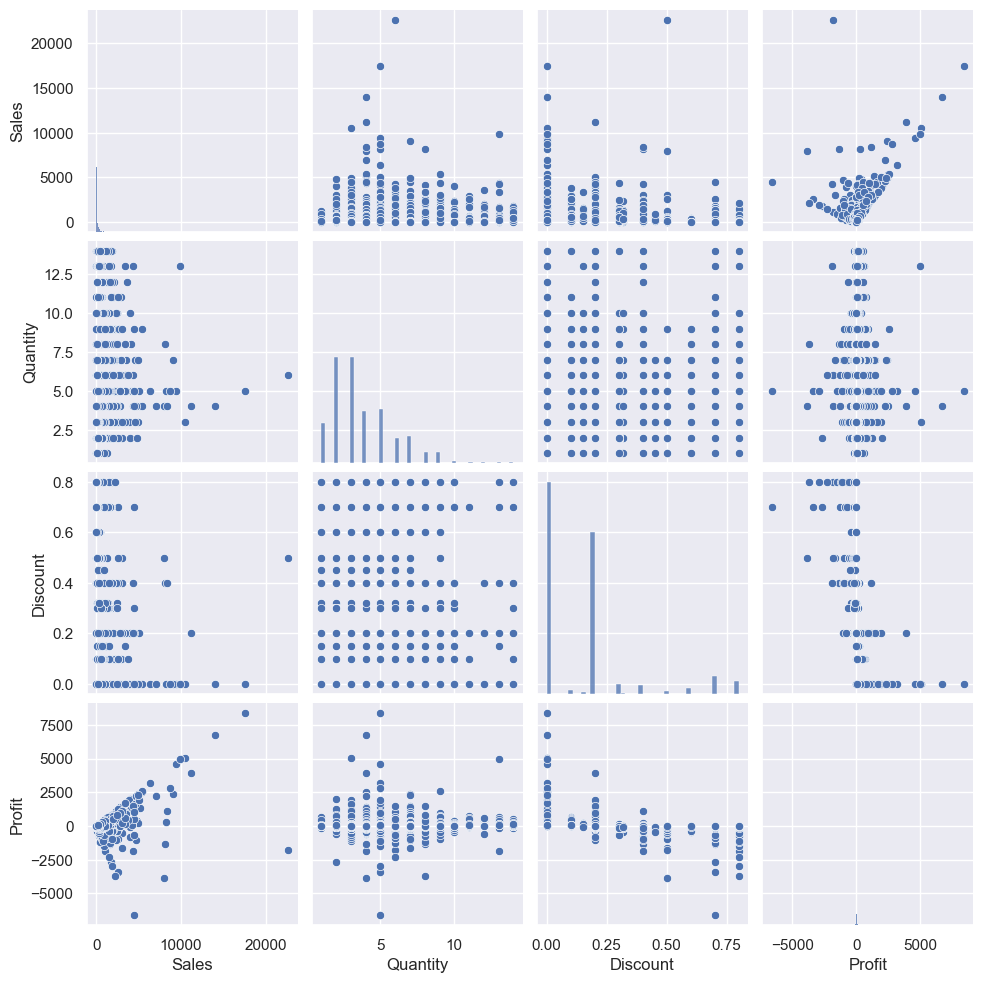

In [87]:
financial=df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In [18]:
#Category Analysis
cat_df=df[['Sales','Quantity','Discount','Profit']]
cat_df.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


<Axes: >

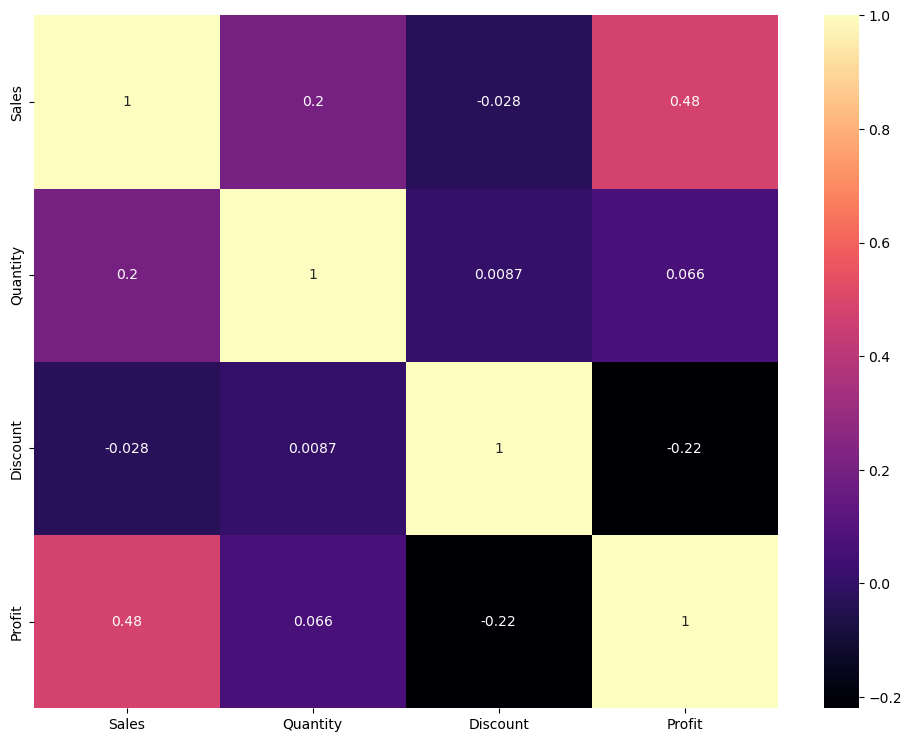

In [19]:
#Correlation between Sales,Quantity,Discount and Profit
plt.figure(figsize=(12,9))
sns.heatmap(cat_df.corr(),annot=True,cmap='magma')

In [22]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [102]:
#Total Sales and Profits of the company?
Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_36612\1711989883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()


Sales     2296195.59
Profit     286241.42
dtype: float64

In [23]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [25]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [26]:
df['City'].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [27]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [29]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<Axes: xlabel='Category', ylabel='Sales'>

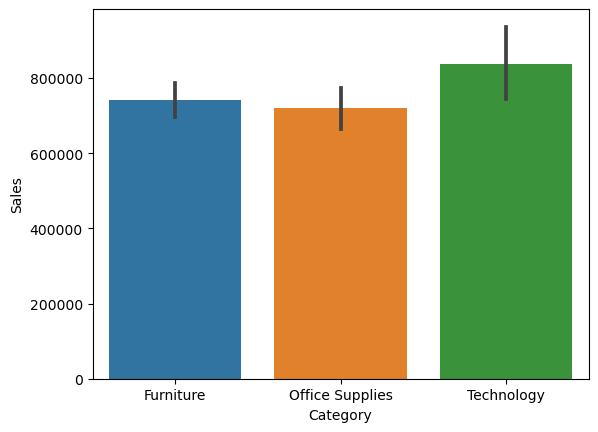

In [30]:
sns.barplot(x='Category',y='Sales',data=df,estimator=sum)

<Axes: xlabel='Category', ylabel='Profit'>

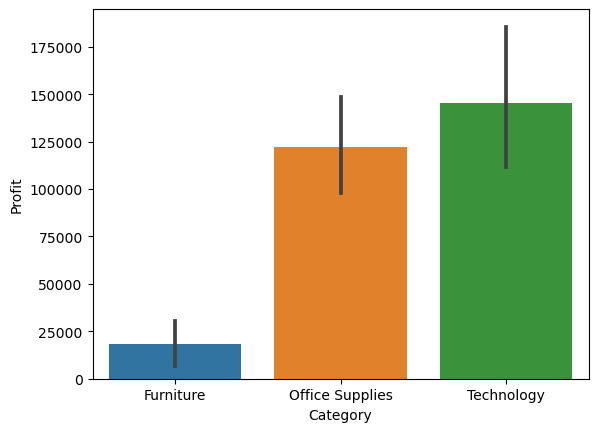

In [31]:
sns.barplot(x='Category',y='Profit',data=df,estimator=sum)

<Figure size 3000x4000 with 0 Axes>

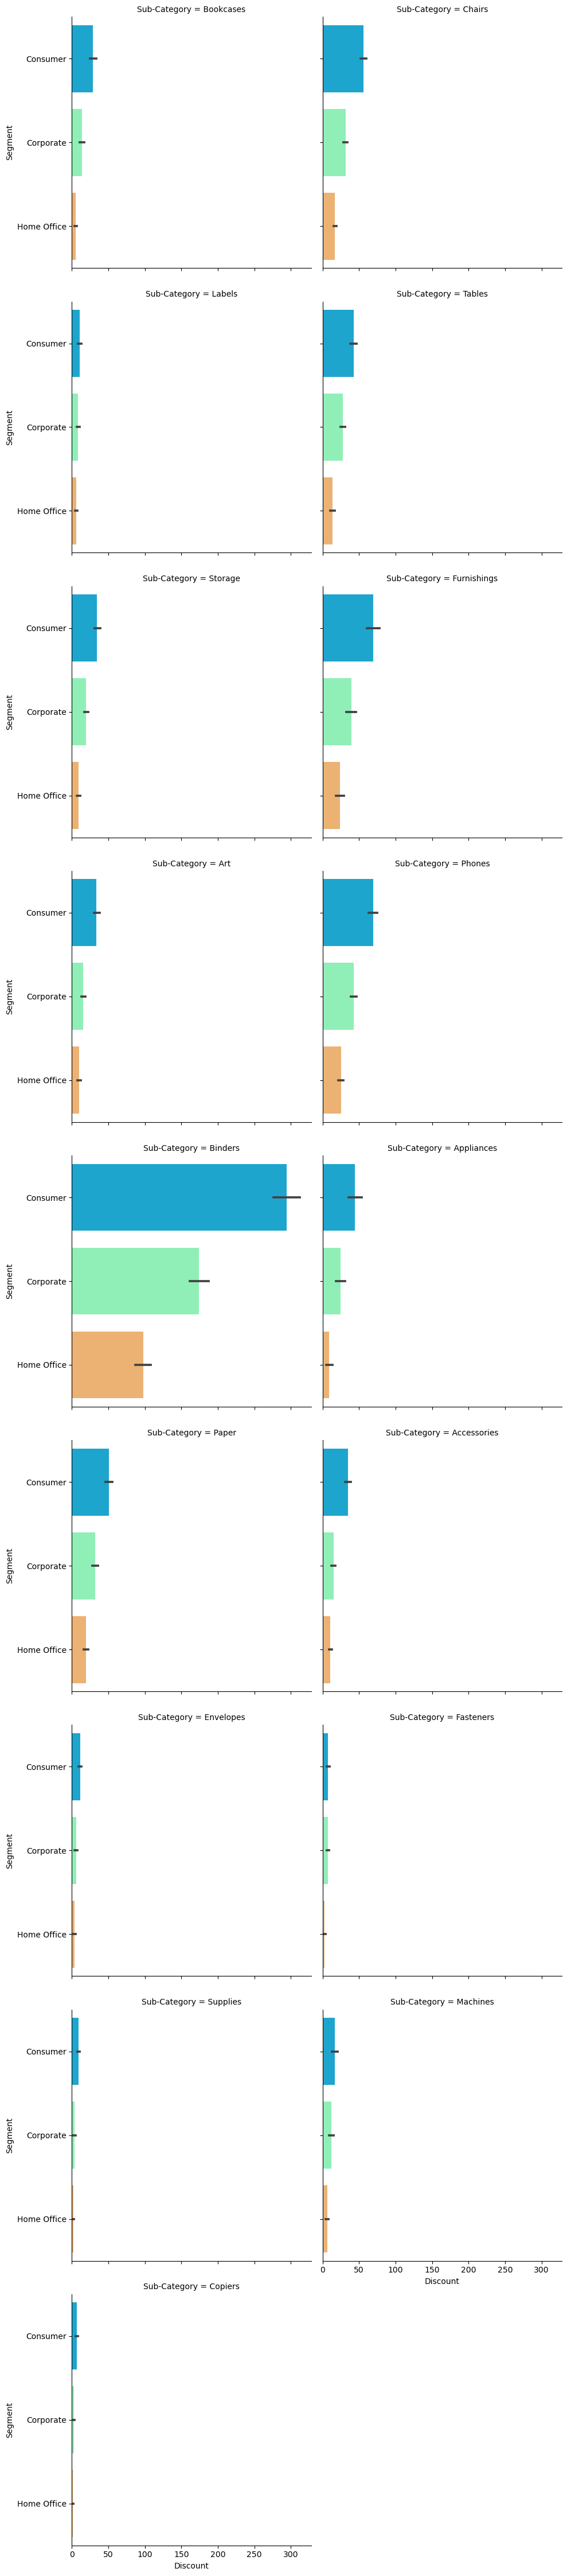

In [44]:
plt.figure(figsize=(30,40))
sns.catplot(y = 'Segment',x = 'Discount',data=df,kind='bar',estimator=sum,palette='rainbow',col='Sub-Category',col_wrap=2)
plt.show()

<Figure size 3000x4000 with 0 Axes>

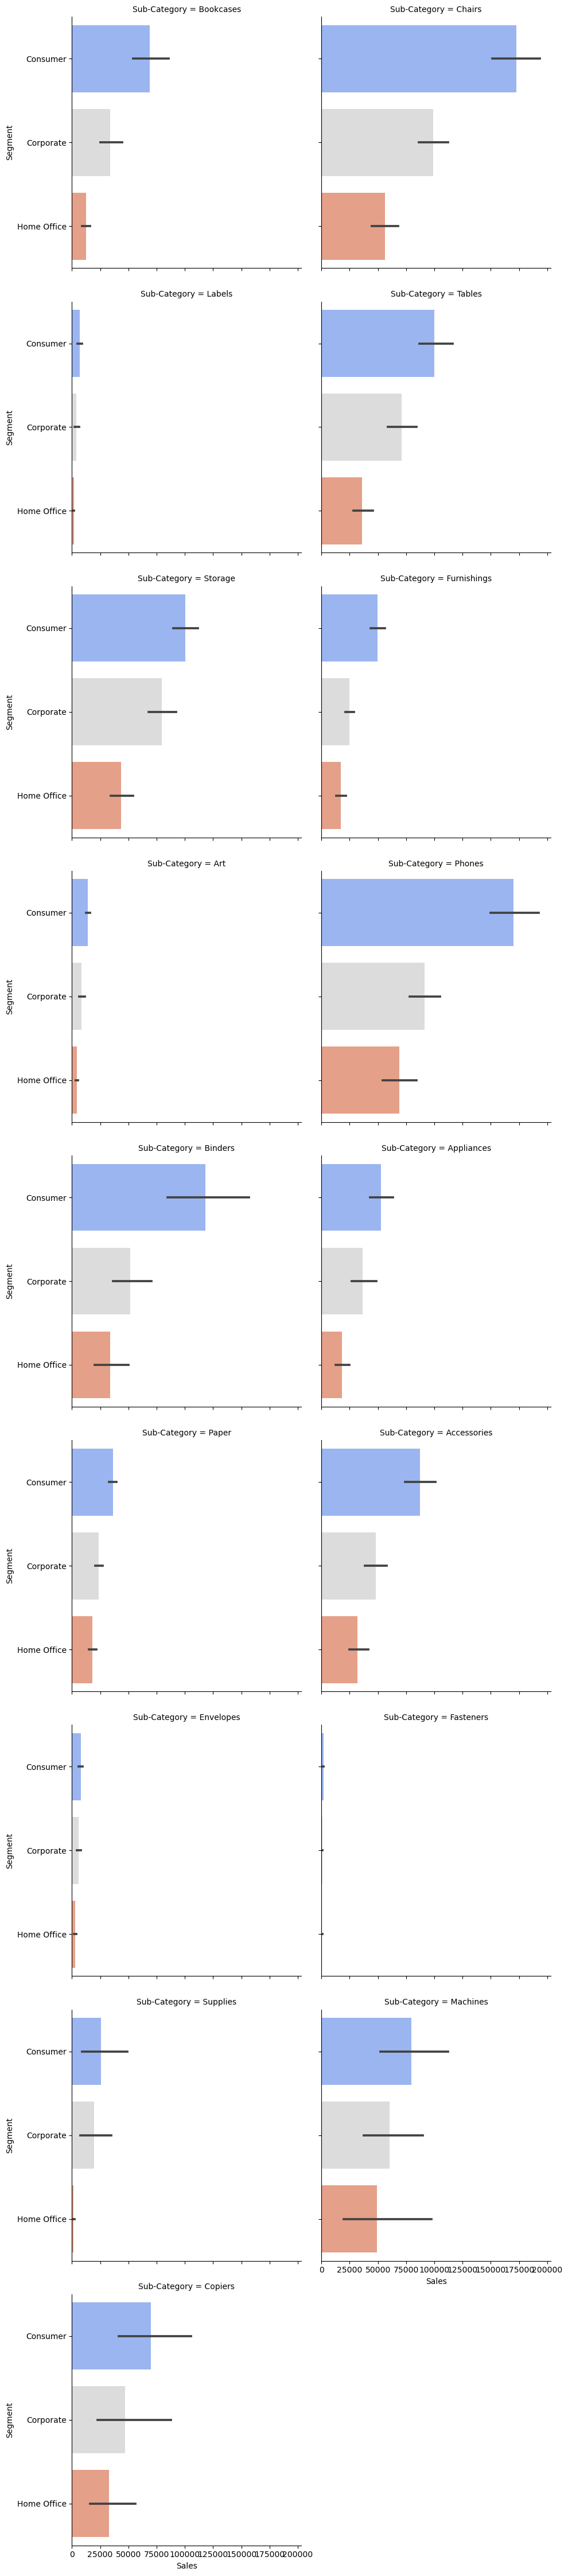

In [41]:
plt.figure(figsize=(30,40))
sns.catplot(y = 'Segment',x = 'Sales',data=df,kind='bar',estimator=sum,palette='coolwarm',col='Sub-Category',col_wrap=2)
plt.show()

<Figure size 3000x4000 with 0 Axes>

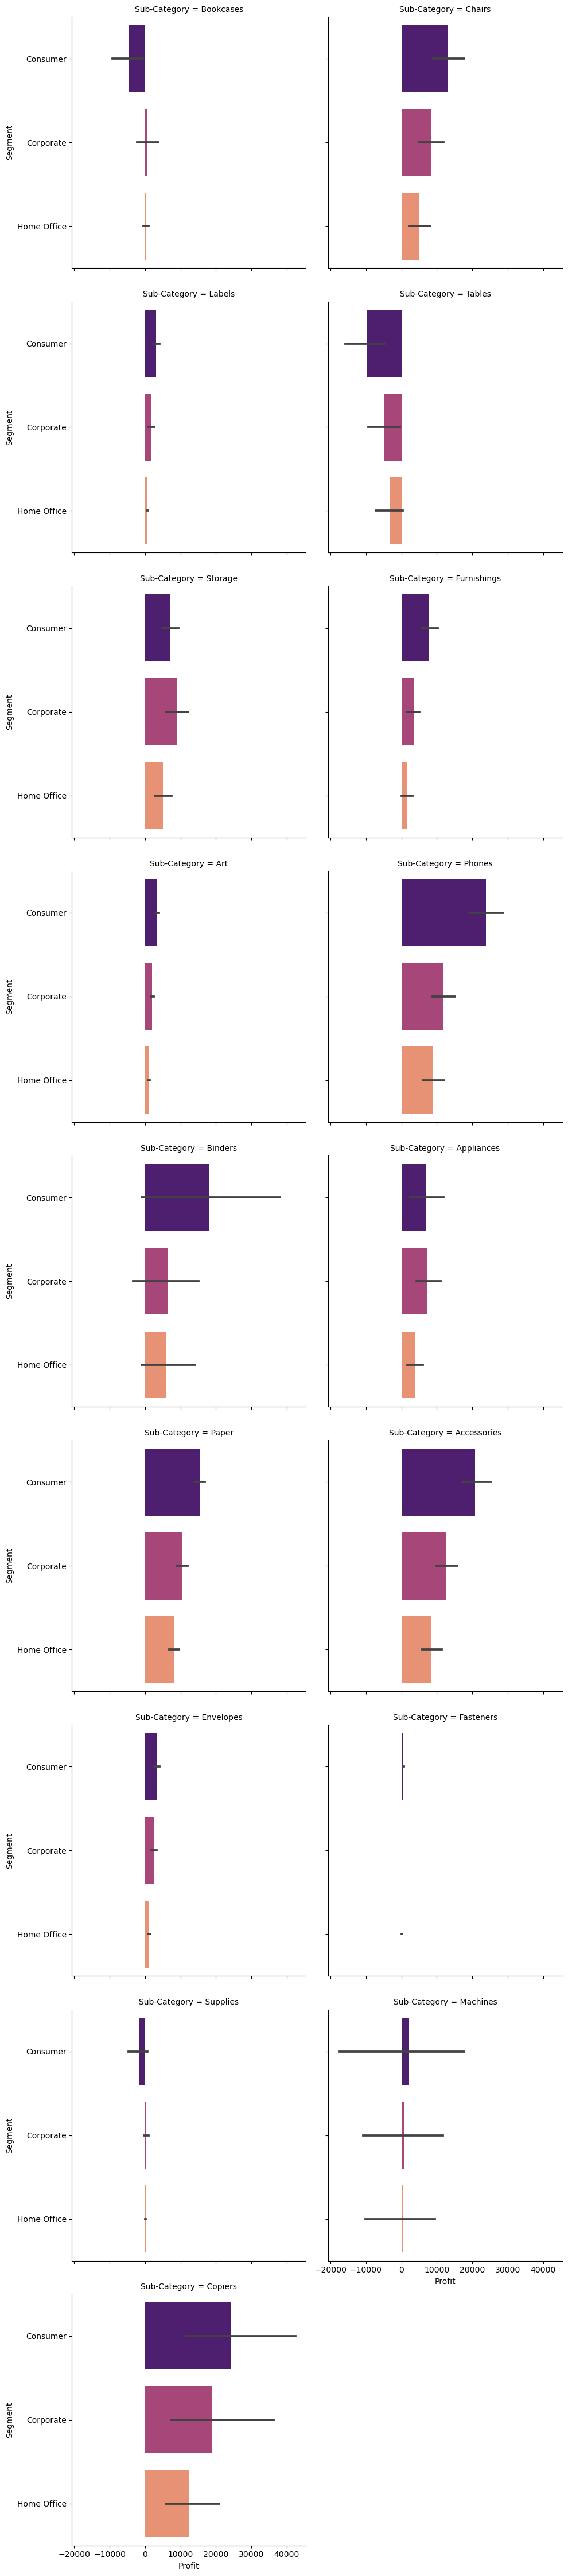

In [45]:
plt.figure(figsize=(30,40))
sns.catplot(y = 'Segment',x = 'Profit',data=df,kind='bar',estimator=sum,palette='magma',col='Sub-Category',col_wrap=2)
plt.show()

From the graphs, we can see that the Home Office Segment is doing poorly in terms of Profit,Discount and sales and the consumer segment is the best performing in terms of discounted sales and profit

BEST SELLING AND MOST PROFITABLE CATEGORY

In [55]:
df_sum = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Discount', 'Profit', 'Quantity']].sum())
df_sum


,Sales,Discount,Profit,Quantity
Category,,,,
Furniture,741306.3133,368.59,18421.8137,8020
Office Supplies,718735.2440,946.20,122364.6608,22861
Technology,836154.0330,244.40,145454.9481,6939


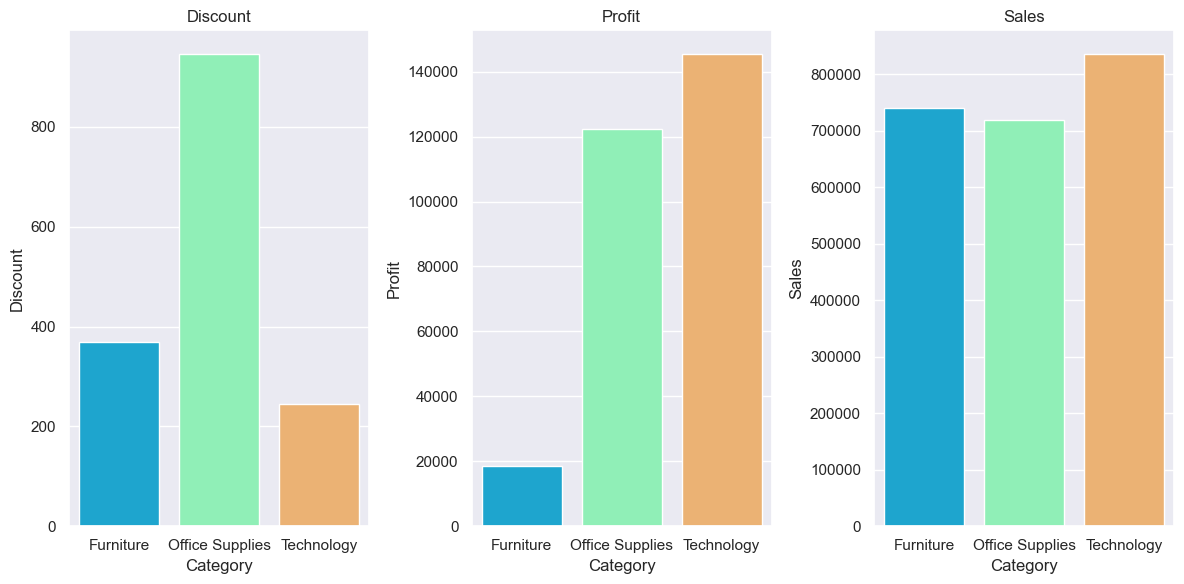

In [59]:
sns.set_theme(style="darkgrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = df_sum.index, y = df_sum.Discount, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df_sum.index, y = df_sum.Profit, ax=axis[1], palette = "rainbow")
cat3 = sns.barplot(x = df_sum.index, y = df_sum.Sales, ax=axis[2], palette = "rainbow")
# Set titles
cat1.set(title = 'Discount')
cat2.set(title = 'Profit')
cat3.set(title = 'Sales')
figure.tight_layout()

Here,we can see that Technology category has the highest Sales and Profits although it has the least Discount.
While Furniture Category has least Profit

# TOP 10 CITIES AND LEAST 10 CITIES BY SALES

In [82]:
city_sales = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().
                             sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_36612\2607823510.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().


,Discount,Sales,Quantity,Profit
City,,,,
Jamestown,0.000000,2354.395000,4.500000,642.885750
Cheyenne,0.200000,1603.136000,4.000000,100.196000
Bellingham,0.066667,1263.413333,8.000000,203.530267
Independence,0.000000,1208.685000,3.000000,487.831500
Burbank,0.066667,1082.386000,4.333333,254.844600
Buffalo,0.060000,906.349600,4.600000,99.287910
Burlington,0.136000,866.723280,4.200000,-144.915088
Beverly,0.000000,861.063333,5.000000,218.306467
Sparks,0.066667,853.986667,6.333333,76.178667


In [84]:
bottom10 = city_sales[-10:]
bottom10

,Discount,Sales,Quantity,Profit
City,,,,
Keller,0.200,6.000,2.0,2.10000
Loveland,0.325,5.241,2.0,1.11945
Layton,0.000,4.960,4.0,2.33120
Springdale,0.000,4.300,2.0,1.41900
San Luis Obispo,0.000,3.620,2.0,1.19460
Ormond Beach,0.700,2.808,3.0,-1.96560
Pensacola,0.700,2.214,3.0,-1.47600
Jupiter,0.200,2.064,1.0,0.15480
Elyria,0.700,1.824,1.0,-1.39840


Jamestown is performing quite well in terms of sales and Abilene is least performed City 

# TOP 10 CITIES AND LEAST 10 CITIES BY PROFIT

In [89]:
city_profits = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().
                             sort_values('Profit',ascending = False))
top10_profits = city_profits[:10]
top10_profits

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_36612\2320857503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_profits = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().


,Discount,Sales,Quantity,Profit
City,,,,
Jamestown,0.000000,2354.395000,4.500000,642.885750
Independence,0.000000,1208.685000,3.000000,487.831500
Lafayette,0.000000,807.619355,3.354839,323.173794
Minneapolis,0.000000,733.501739,3.478261,296.721070
Appleton,0.000000,835.655000,6.000000,277.383150
Morristown,0.000000,719.014286,4.428571,262.603871
Burbank,0.066667,1082.386000,4.333333,254.844600
Lehi,0.100000,758.363000,4.000000,225.831300
Beverly,0.000000,861.063333,5.000000,218.306467


In [90]:
bottom10 = city_profits[-10:]
bottom10

,Discount,Sales,Quantity,Profit
City,,,,
Yuma,0.450000,210.216250,5.500000,-116.497725
San Antonio,0.383051,370.229288,4.186441,-123.712715
Burlington,0.136000,866.723280,4.200000,-144.915088
Medina,0.433333,275.302444,4.222222,-149.227178
Clarksville,0.271429,316.818571,3.857143,-150.764743
Lancaster,0.315217,215.031826,3.717391,-157.371052
Round Rock,0.274286,693.436114,3.285714,-169.061614
Oswego,0.600000,107.326000,4.333333,-178.709200
Champaign,0.600000,151.960000,5.000000,-182.352000


Jamestown is performing quite well in terms of Profits and Bethlehem is least performed City

# TOP 10 CITIES AND LEAST 10 CITIES BY DISCOUNT

In [92]:
city_discount = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().
                             sort_values('Discount',ascending = False))
top10_discount = city_discount[:10]
top10_discount

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_36612\284043999.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_discount = pd.DataFrame(df.groupby(['City'])['Discount','Sales','Quantity','Profit'].mean().


,Discount,Sales,Quantity,Profit
City,,,,
Missouri City,0.800000,6.3700,7.0,-9.55500
Romeoville,0.800000,8.9520,2.0,-14.77080
Deer Park,0.800000,6.9240,6.0,-10.38600
Abilene,0.800000,1.3920,2.0,-3.75840
Elyria,0.700000,1.8240,1.0,-1.39840
Littleton,0.700000,72.2940,1.0,-98.80180
Ormond Beach,0.700000,2.8080,3.0,-1.96560
Pensacola,0.700000,2.2140,3.0,-1.47600
Tyler,0.640000,69.4412,3.2,-88.74172


In [93]:
bottom10 = city_discount[-10:]
bottom10

,Discount,Sales,Quantity,Profit
City,,,,
Middletown,0.0,128.290000,3.111111,17.512878
Milford,0.0,160.290000,5.000000,53.175667
Milwaukee,0.0,253.560444,4.466667,62.068558
Minneapolis,0.0,733.501739,3.478261,296.721070
Mishawaka,0.0,388.120000,5.500000,48.296000
Mobile,0.0,496.635455,4.727273,197.802655
Montebello,0.0,27.880000,2.000000,3.903200
Montgomery,0.0,372.273000,4.800000,83.465710
Moorhead,0.0,271.930000,4.500000,50.705300


EXPLORING CATEGORY AND SUB-CATEGORY

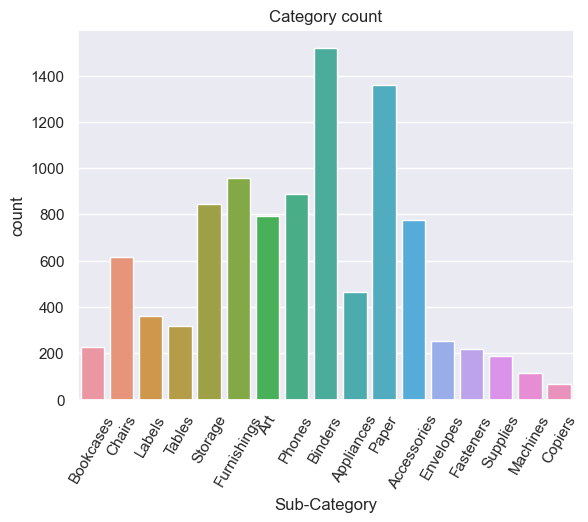

In [94]:
sns.countplot(x='Sub-Category', data = df)
sns.set_theme(style="darkgrid")
plt.title('Category count')
plt.xticks(rotation = 60)
plt.show()

In [95]:
df.groupby(['Category','Sub-Category']).sum()

C:\Users\Niveditha S\AppData\Local\Temp\ipykernel_36612\3113880074.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category','Sub-Category']).sum()


Postal Code        Sales  Quantity  Discount  \
Category        Sub-Category                                                 
Furniture       Bookcases        12771539  114879.9963       868     48.14   
                Chairs           34844773  327777.7610      2351    104.70   
                Furnishings      51782325   91683.0240      3560    132.40   
                Tables           18607828  206965.5320      1241     83.35   
Office Supplies Appliances       25250538  107532.1610      1729     77.60   
                Art              43235536   27107.0320      2996     59.60   
                Binders          83565745  203409.1690      5971    566.20   
                Envelopes        13325731   16476.4020       906     20.40   
                Fasteners        12506063    3024.2800       914     17.80   
                Labels           19458863   12444.9120      1396     25.00   
                Paper            75446104   78224.1420      5144    101.80   
                Storage          46248720  223843.6080      3158     63.20   
                Supplies         10633558   46673.5380       647     14.60   
Technology      Accessories      44468434  167380.3180      2976     60.80   
                Copiers           3873477  149528.0300       234     11.00   
                Machines          6364668  189238.6310       440     35.20   
                Phones           47897175  330007.0540      3289    137.40   

                                  Profit  
Category        Sub-Category              
Furniture       Bookcases     -3472.5560  
                Chairs        26567.1278  
                Furnishings   13052.7230  
                Tables       -17725.4811  
Office Supplies Appliances    18138.0054  
                Art            6524.6118  
                Binders       30228.0003  
                Envelopes      6964.1767  
                Fasteners       949.5182  
                Labels         5526.3820  
                Paper         33944.2395  
                Storage       21278.8264  
                Supplies      -1189.0995  
Technology      Accessories   41936.6357  
                Copiers       55617.8249  
                Machines       3384.7569  
                Phones        44515.7306

# SUMMARY

1)TOTAL SALES AND PROFITS OF THE COMPANY ?

Sales     2296195.59, 
Profit     286241.42

2)Top 10 Cities by Sales and Profits

Top 10 Cities by Sales
Jamestown, 
 Cheyenne,
 Bellingham,
 Independence,
 Burbank,
 Buffalo,
 Burlington,
 Beverly,
 Sparks,
 Appleton

Top 10 cities by Profit
Jamestown,
 Independence,
 Lafayette,
 Minneapolis,
 Appleton,
 Morristown,
 Burbank,
 Lehi,
 Beverly,
 Warwick

3)Furniture Category is the only loss making sector

Losses are occured in Furniture Category because of Tables.Tables are generating a loss of about -177254

4)Highest Profit is generated by Copiers under Technology Category

# CONCLUSION

If we give more Discount on products our sales increse but Profit comparitively decreases

In Technology category business we get more Profit as compared to other two business.These is because of the less Discount given in Technology Department

 Here we also focus on our Office Supplies category business because sales of this category is less as compared to the other two.

 Also Sales in 'Fasteners', 'labels' and 'Art' category are so weak.So we have to concentrate on these sub-category businesses.

 We have to concentrate on the Sales of 'Jupiter', 'Elyria' and 'Abilene' City

For enhancing the profits , we need to sell more to the cities which are most purchasing our products like Jamestown and Independence 